# http://karpov.courses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Описание
На этот раз данные имеют следующую структуру:

* записываются для каждого пользователя, совершившего покупки, каждый день
* для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
* внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv
          
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

Note: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

### Задание 1
💀 Сложное задание! 💀

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

В качестве ответа укажите сумму по колонке quantity.

In [8]:
from pathlib import Path
from os import walk

Я знаю два способа считывания содержимого из сложной директории - при помощи библиотек pathlib или os.
Они рассмотрены в двух ячейках ниже. Способ с pathlib выглядит менее громоздким. 

In [28]:
files_path_1 = []

# Create a Path object for the root directory
root_directory = Path('data/')

# Use rglob to iterate through all files and directories recursively
for file_path in root_directory.rglob('*.csv'):
    # print(file_path)
    files_path_1.append(file_path)

In [35]:
files_path_1[0].parts

('data', '2020-12-06', 'Vasiliy_Fedorov', 'data.csv')

In [29]:
files_path_2 = []

for root, dirs, files in walk(top='data'):
    # print(files)
    if files:
        for file in files:
            if '.csv' in file:
                temp = root + '/' + file
                files_path_2.append(temp)

In [69]:
# Create an empty DataFrame:
column_names = ['product_id', 'quantity', 'name', 'date']
df = pd.DataFrame(columns=column_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  0 non-null      object
 1   quantity    0 non-null      object
 2   name        0 non-null      object
 3   date        0 non-null      object
dtypes: object(4)
memory usage: 124.0+ bytes


In [70]:
# Change to appropriate dtype
df = df.astype({'product_id': 'int', 'quantity': 'int',
                'name': 'str', 'date': 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  0 non-null      int64 
 1   quantity    0 non-null      int64 
 2   name        0 non-null      object
 3   date        0 non-null      object
dtypes: int64(2), object(2)
memory usage: 124.0+ bytes


In [71]:
for file_path in files_path_1:
    # read the current file     
    temp_df = pd.read_csv(file_path, sep=',', index_col=0)
    # create 'name' and 'date' columns
    temp_name = file_path.parts[2]
    temp_date = file_path.parts[1]
    temp_df['name'] = temp_name
    temp_df['date'] = temp_date
    # concat to the main DataFrame
    df = pd.concat([df, temp_df])

# print(df)

In [73]:
quantity_sum = df['quantity'].sum()
print(quantity_sum)

480


### Задание 2
Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:

Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev

In [81]:
df.groupby('name').agg({'quantity': 'sum'}) \
    .sort_values(by='quantity', ascending=False).head()

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28


In [85]:
# Alternative
temp = df.groupby('name').agg({'quantity': 'sum'}) \
    .sort_values(by='quantity', ascending=False)
temp = temp[temp['quantity'] == temp['quantity'].max()]

for name in temp.index:
    print(name)

Alexey_Smirnov
Petr_Smirnov


### Задание 3
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:
* по оси x – идентификаторы товаров (product_id) 
* по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [87]:
df.head()

,product_id,quantity,name,date
0,56,4,Vasiliy_Fedorov,2020-12-06
1,97,3,Vasiliy_Fedorov,2020-12-06
2,79,3,Vasiliy_Fedorov,2020-12-06
3,29,5,Vasiliy_Fedorov,2020-12-06
0,73,5,Alexey_Fedorov,2020-12-08


In [91]:
temp = df.groupby(by='product_id').agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)
temp.head(10)

,quantity
product_id,
27,20
56,18
24,15
74,15
41,14
34,13
94,13
66,13
92,12


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


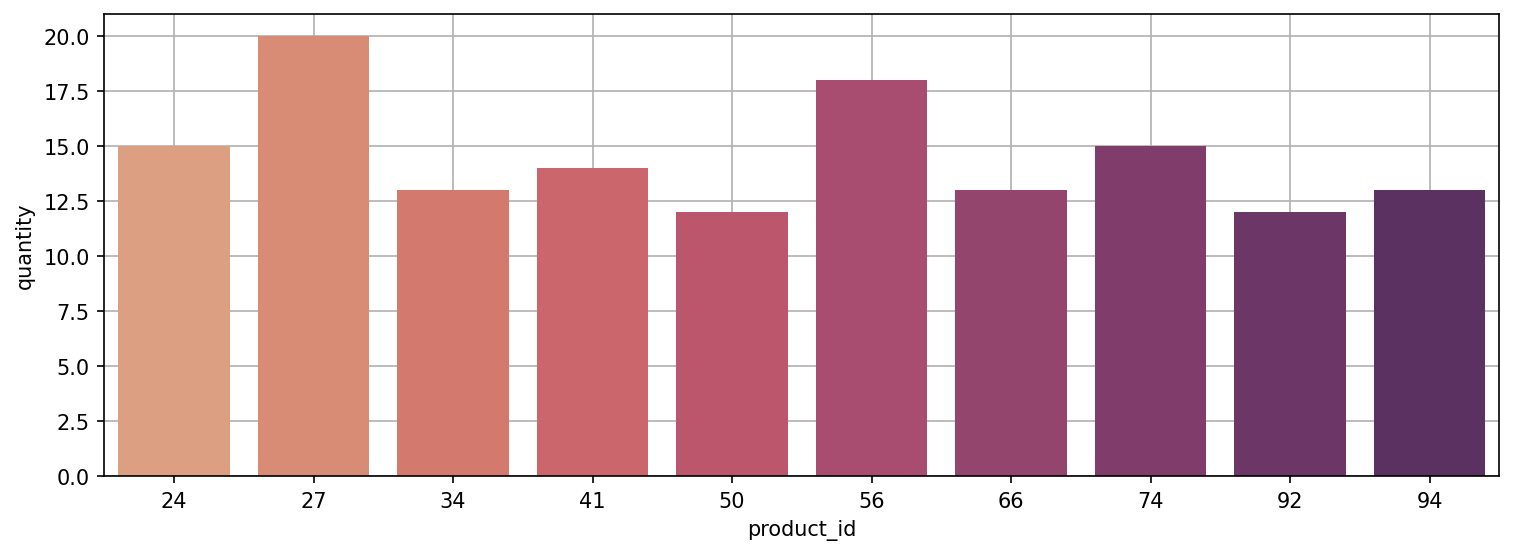

In [101]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=150)
ax = sns.barplot(data=temp.head(10), x=temp.head(10).index, y='quantity',
                palette='flare', zorder=2)
ax.grid(zorder=1);

### Задание 4
Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). 

In [102]:
temp = df.groupby(by='date').agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)
temp.head(10)

,quantity
date,
2020-12-04,113
2020-12-07,94
2020-12-09,69
2020-12-08,68
2020-12-05,61
2020-12-03,60
2020-12-06,15


/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/igor/miniconda3/envs/sandbox/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


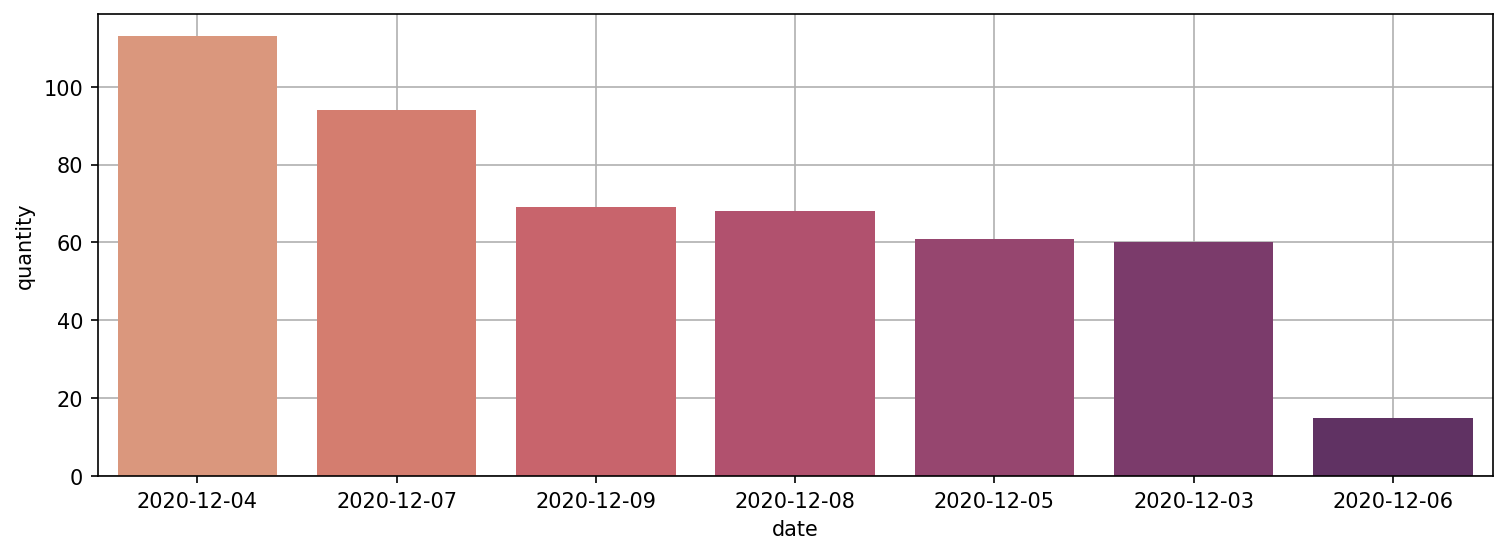

In [103]:
fig, ax = plt.subplots(figsize=(12, 4), dpi=150)
ax = sns.barplot(data=temp.head(10), x=temp.head(10).index, y='quantity',
                palette='flare', zorder=2)
ax.grid(zorder=1);

### Задание 5
💀 Сложное задание! 💀

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается. 

In [104]:
df.head()

,product_id,quantity,name,date
0,56,4,Vasiliy_Fedorov,2020-12-06
1,97,3,Vasiliy_Fedorov,2020-12-06
2,79,3,Vasiliy_Fedorov,2020-12-06
3,29,5,Vasiliy_Fedorov,2020-12-06
0,73,5,Alexey_Fedorov,2020-12-08


In [140]:
temp = df.groupby(by=['name', 'date']).agg({"product_id": "value_counts"})
temp.rename(columns={"product_id": 'occurrences_per_day'}, inplace=True)
temp.reset_index(inplace=True)
temp

,name,date,product_id,occurrences_per_day
0,Alexey_Fedorov,2020-12-05,13,1
1,Alexey_Fedorov,2020-12-05,50,1
2,Alexey_Fedorov,2020-12-07,15,1
3,Alexey_Fedorov,2020-12-07,54,1
4,Alexey_Fedorov,2020-12-07,77,1
...,...,...,...,...
155,Vasiliy_Ivanov,2020-12-09,54,1
156,Vasiliy_Ivanov,2020-12-09,74,1
157,Vasiliy_Ivanov,2020-12-09,82,1
158,Vasiliy_Petrov,2020-12-03,27,1


In [141]:
# Now we know that if a specific product_id appears more than 1 time for a specific user,
# the product is bought on some other day
new_temp = temp.groupby(by='name').agg({'product_id': 'value_counts'})
new_temp.rename(columns={"product_id": 'occurrences_overall'}, inplace=True)
new_temp

occurrences_overall
name           product_id                     
Alexey_Fedorov 13                            1
               15                            1
               77                            1
               18                            1
               34                            1
...                                        ...
Vasiliy_Ivanov 83                            1
               94                            1
               95                            1
Vasiliy_Petrov 27                            1
               78                            1

[158 rows x 1 columns]

In [137]:
new_temp[new_temp['occurrences_overall'] > 1]

,,occurrences_overall
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


### Дополнительный проект
И небольшой минипроект на фильтрацию данных!

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.
* inn.xls — таблица в экселевском формате
* necessary_inn.txt — перечень необходимых ИНН в текстовом формате

#### Задачи
1. извлечь из таблицы записи с ИНН, указанными в текстовом файле
2. записать результат в файл selected_inn.csv

В качестве проверки укажите сумму колонки income,RUB в отобранных данных.
NB! У набора данных necessary_inn.txt нет заголовка, поэтому вам пригодится аргумент header=None. 

In [167]:
necessary_inn = Path('4_necessary_inn.txt').read_text()  # whole text
necessary_inn = necessary_inn.splitlines()  # redefiniton
print(necessary_inn[:5])  # this is str!

for i in range(len(necessary_inn)):
    necessary_inn[i] = int(necessary_inn[i])
print(necessary_inn[:5])  # this is int   

['394609645484', '281578625230', '923769811917', '998694734508', '271011690615']
[394609645484, 281578625230, 923769811917, 998694734508, 271011690615]


In [158]:
inn = pd.read_excel(io='4_inn.xls',index_col="#")# header=None)
inn.drop(columns='Unnamed: 0', inplace=True)
inn.head()

,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
#,,,,,,,,,,,,,,,,,,
0,"ЗАО «Власова, Макаров и Шашков»",1143692580560,"д. Кирово-Чепецк, пр. Металлургов, д. 537 к. 3...",Жданов Карл Виленович,Маммолог,109092209811,+7 (559) 338-87-76,bogdanovavtonom@yahoo.com,ooo.info,2015-01-07,2006-10-04,21112877268,73423615032,Ulan-Ude,"к. Тосно, ул. Пушкинская, д. 896, 617222",Синхронизация критически важных отношений,54875526078,32205872896
1,"РАО «Тимофеева, Алексеева и Кузнецова»",9342309660697,"г. Арзамас, наб. Фестивальная, д. 7 стр. 8/2, ...",Рожков Харлампий Алексеевич,Воспитатель,704229465069,8 (632) 620-8879,safonovantonin@rao.org,ooo.net,1990-05-16,2019-01-18,18393547520,19072454279,Tyoply Stan,"ст. Кяхта, бул. Нефтяников, д. 24, 768742",Формирование заказных методик,33876448811,47437574301
2,РАО «Юдин-Ефимова»,1277485323451,"п. Меренга, алл. Достоевского, д. 3/4 к. 497, ...",Филимон Фадеевич Дьячков,Автослесарь,267655036377,+74925330378,kdorofeev@npo.ru,ao.com,1982-11-04,1986-06-19,56104355836,18629292792,Danilov,"клх Усолье Сибирское, алл. Шишкина, д. 3/9 к. ...",Максимизация корпоративных метрик,94073834991,7701710065
3,Доронин Инкорпорэйтед,7139161431511,"д. Иваново, ул. Красных Партизан, д. 83 к. 4, ...",Крылов Глеб Якубович,Тюремный надзиратель,362024991175,+7 118 643 21 48,nkulakova@mail.ru,ooo.ru,2005-01-02,2004-04-06,10398489351,32502585383,Beryozovsky,"г. Заводоуковск, ул. Гражданская, д. 7 к. 8/5,...",Разработка ориентированных на пользователя инт...,86971505490,61148002572
4,Объединенная энергетическая компания,6114798049639,"к. Энгельс, наб. Шишкина, д. 120, 823828",Субботин Вячеслав Федотович,Инженер-электрик,257948948010,8 642 249 2134,evgraf_18@yahoo.com,gerasimova.biz,1983-07-02,1992-06-20,20074507047,40083207999,Bavly,"к. Соль-Илецк, пер. Пригородный, д. 804 к. 1/3...",Монетизация интуитивных веб-сервисов,36351136214,34861533393


In [169]:
(inn['head_inn'].isin(necessary_inn)).head()

#
0    False
1    False
2    False
3    False
4    False
Name: head_inn, dtype: bool

In [172]:
selected_inn = inn[inn['head_inn'].isin(necessary_inn)]
selected_inn.head()

,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
#,,,,,,,,,,,,,,,,,,
47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019


In [173]:
selected_inn.to_csv(path_or_buf='selected_inn.csv')

In [174]:
selected_inn['income,RUB'].sum()

6104522627393